## ANOVA (Analysis of Variance) test
### Is a statistical technique used to compare the means of three or more groups to determine whether there are statistically significant differences between them.


#### Key points :
### When to use : 
####                         Independent variable is categorical, dependent variable is numerical
### Goal  : 
####                         To determine the effects of discrete independent variables(groups,levels) on a continuous dependent variable


#### Assumptions :

####  1 Normal Distribution  (Data is distributed normally)
####  2 No Outliers
####  3 Homoginity of Variance , Each one of the populations has same variance( σ2 =σ2=σ2...)
####      Population variance in different levels of each independent variable are equal
####  4 Sample are independent & random

### 
### Null Hypothesis (H0): The null hypothesis in ANOVA states that there is no significant difference between the means of the groups being compared.
### Alternative Hypothesis (HA): Alternative hypothesis in ANOVA states that at least one of the group means is different from the others.


### Factors (Variables) : obseravation  , Levels :
###  Factors = Medicines, Levels  : 5mg, 10mg, 20mg

## 1 :- Anova 1-way


In [5]:
# import required libraries
import numpy as np
import pandas as pd
import pingouin as pg

In [6]:
#Example data: three groups with sample observations
group1 = np.random.normal(loc=4,scale=5,size = 40)
group2 = np.random.normal(loc=6,scale=5,size = 40)
group3 = np.random.normal(loc=9,scale=5,size = 40)

In [7]:
# stack group data horizonatlly 
stacked_data = np.hstack((group1,group2,group3))

In [8]:
stacked_data

array([-3.5986985 , -1.63214297, 11.91994313,  3.0633225 ,  3.66768437,
        7.99994252,  9.79356845, 13.50517083,  1.26960493, -2.10572008,
       -0.33698704, 13.37827244,  5.64858601, 13.83018561, -8.22255284,
        0.28930549,  0.97126958,  5.46825234,  8.67334027,  6.01979633,
       -8.7149772 ,  8.65763506, 10.05916819, -2.19739256, 12.77301854,
        9.45019003,  3.9330099 , -0.42829458,  2.44724784, 10.46160474,
        5.1111035 , -1.25214034,  3.72457386,  6.03449285,  4.75759064,
       -5.77297583, -1.02397464,  4.00304138,  4.68881227,  5.67813945,
        2.60848165,  2.73692937, 14.57291043, 11.35075597,  1.01852381,
        7.43785634,  3.69386314,  8.79512869,  9.85259955, -0.76841197,
        1.89256124, 16.50928975,  8.27669597, 10.23101447,  4.0928499 ,
       14.17561708, 11.24801184,  5.60047306,  8.42371801,  4.37750275,
        4.17764732,  5.05645539,  7.27159401,  7.44801194,  4.90826175,
        7.63300792,  4.43967455, -1.92359867, 12.43979088,  8.94

In [9]:
labels = ['Group1']*len(group1) +['Group2']*len(group2)+['Group3']*len(group3)


In [10]:
final_data=pd.DataFrame({'Observation' :stacked_data,'Group' : labels  })
final_data.tail()

,Observation,Group
115,18.597612,Group3
116,11.047460,Group3
117,2.908126,Group3
118,13.097941,Group3
119,8.951723,Group3


In [11]:
#lets perform ANOVA test to see is there any differennce in the disctribution among 3 groups
anova_result = pg.anova(data=final_data,dv='Observation',between = 'Group')
anova_result

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,117,11.542236,0.000027,0.16479


#### p_value < 0.05 , thats we need to reject null hypothesis , there is difference in mean of 3 gorups.
#### Lets do post_hoc analysis to analyze individula groups

In [12]:
pg.pairwise_tukey(data=final_data,dv='Observation',between = 'Group')


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Group1,Group2,4.049800,6.332064,-2.282264,1.152468,-1.980327,0.121598,-0.426156
1,Group1,Group3,4.049800,9.560000,-5.510200,1.152468,-4.781217,0.000015,-1.017266
2,Group2,Group3,6.332064,9.560000,-3.227936,1.152468,-2.800889,0.016317,-0.669737


<AxesSubplot:xlabel='Group', ylabel='Observation'>

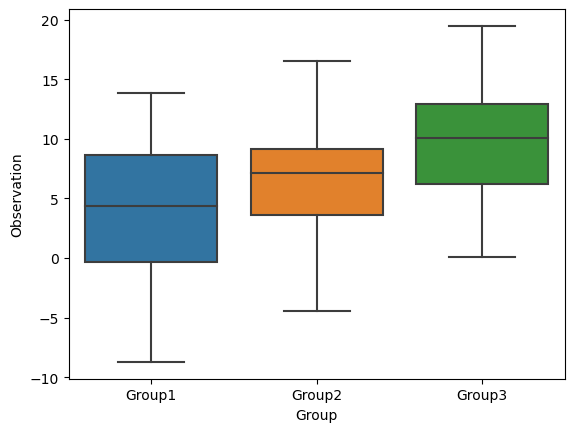

In [13]:
import seaborn as sns
sns.boxplot(data=final_data,y= 'Observation',x='Group')

## 2: 2_way_mixed_anova

####  No of Factors : 2 or more
####  No of Levels : 2 or more 

In [43]:
# Define number of subjects, levels for within-subject factor, and levels for between-subject factor
num_subjects = 50
levels_within = 3
levels_between = 2

# Generate random data for within-subject factor
within_data = np.random.randint(1, 10, size=(num_subjects, levels_within))

# Generate random data for between-subject factor
between_data = np.random.choice(['Group A', 'Group B'], size=num_subjects)

# Generate random data for dependent variable
dependent_variable = np.random.normal(loc=10, scale=2, size=(num_subjects, levels_within))

# Flatten the data into a DataFrame
data = {'Subject_ID': [], 'Between_Factor': [], 'Within_Factor': [], 'Dependent_Variable': []}

for subject, between_group in zip(range(num_subjects), between_data):
    for level, within_value in enumerate(within_data[subject]):
        data['Subject_ID'].append(subject)
        data['Between_Factor'].append(between_group)
        data['Within_Factor'].append(f'Level_{level + 1}')
        data['Dependent_Variable'].append(dependent_variable[subject, level])

df = pd.DataFrame(data)

# Display first few rows of the DataFrame
print(df.head())


   Subject_ID Between_Factor Within_Factor  Dependent_Variable
0           0        Group A       Level_1            9.895891
1           0        Group A       Level_2            9.959554
2           0        Group A       Level_3            8.603578
3           1        Group B       Level_1            6.503470
4           1        Group B       Level_2            7.921016


In [47]:
pg.mixed_anova(data=df, dv='Dependent_Variable',between='Between_Factor',within='Within_Factor',subject='Subject_ID')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Between_Factor,0.083816,1,48,0.083816,0.021041,0.885274,0.000438,NaN
1,Within_Factor,4.110920,2,96,2.055460,0.556452,0.575077,0.011460,0.940043
2,Interaction,10.341365,2,96,5.170683,1.399802,0.251634,0.028336,NaN
